
### T cell clustering and annotation (CD4/CD8)
Building on the compositional analysis performed in Notebook 07, this notebook focuses on the biological interpretation of T-cell states.

**Objective**
Further characterize T-cell heterogeneity by refining clustering within the T-cell compartment and annotating major functional states associated with Influenza infection and pregnancy.

Rather than enforcing strict CD4/CD8 identities, this analysis focuses on transcriptional states (naïve/memory-like, cytotoxic, activated, proliferating), based on the marker genes detectable in the dataset.

**Input**
- T cell–only AnnData object generated in Notebook 07, including:
    - T-cell–specific normalization and HVG selection
    - Leiden clustering (leiden_t)
    - Conservative T-cell subtype annotations (tcell_subtype)
    - Condition labels (HC, IA, PHC, PI)

**Methods**
- Re-embedding of the T-cell subset using:
   - PCA on T-cell–specific highly variable genes.
   - Neighbor graph construction and Leiden clustering.
   - UMAP visualization.

- Marker-based annotation of T-cell functional states using genes present in the dataset, including:
   - T-cell identity: CD3D, TRAC.
   - Naïve / memory–like T cells: IL7R.
   - Cytotoxic T cells: NKG7, GNLY, GZMB, PRF1.
   - Activated / exhausted-like T cells: LAG3.
   - Proliferating T cells: MKI67.

- Annotation strategy:

   - Subtype labels are assigned conservatively, based on concordant marker expression.
   - Ambiguous or transitional clusters are retained as Mixed / unassigned to avoid over-interpretation.
   - CD4/CD8 identities are treated as “CD4-like” or “cytotoxic T” states when canonical markers are absent.

**Output**
- UMAP visualization of T cells colored by:
  - Refined Leiden cluster.
  - Functional T-cell states.
  - Clinical condition.

- Annotated T-cell object suitable for:
  - Subtype-specific comparisons.
  - Condition-stratified analyses.
  - Downstream differential expression and pathway analysis.

**Notes**
- This notebook emphasizes state-based interpretation rather than strict lineage assignment.
- Marker availability constrains annotation granularity and is explicitly acknowledged.
- The analysis provides the biological foundation for subtype-resolved differential expression in subsequent notebooks (e.g. pseudobulk or intra-subtype DE).

**Relationship to previous and next steps**
- Notebook 07: establishes T-cell composition and state distribution across conditions.
- Notebook 08: refines T-cell states and prepares subtype-specific analyses.
- Notebook 09: performs statistical testing (pseudobulk DESeq2) at the patient.

In [15]:
import scanpy as sc
from pathlib import Path

# Force Scanpy to save figures into results/figures
figdir = Path("../results/figures")
figdir.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = figdir

print("Scanpy figures will be saved to:", sc.settings.figdir)

Scanpy figures will be saved to: ../results/figures


In [4]:
# Load T-cell object + sanity checks
import scanpy as sc

# Load the T-cell annotated object generated in Notebook 07
adata_t = sc.read_h5ad("../results/adata_tcells_annotated.h5ad")

# Basic sanity checks
print(adata_t)
print("\nConditions:")
print(adata_t.obs["condition"].value_counts())

print("\nT-cell subtypes:")
print(adata_t.obs["tcell_subtype"].value_counts())

print("\nLeiden clusters:")
print(adata_t.obs["leiden_t"].value_counts().sort_index())

AnnData object with n_obs × n_vars = 6044 × 1103
    obs: 'gsm', 'sample_id', 'condition', 'replicate', 'batch', 'leiden', 'cell_type', 'leiden_t', 'tcell_subtype'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'condition_colors', 'dendrogram_leiden_t', 'hvg', 'leiden', 'leiden_t', 'leiden_t_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'X_input'
    obsp: 'connectivities', 'distances'

Conditions:
condition
PHC    2403
HC     1900
PI     1019
IA      722
Name: count, dtype: int64

T-cell subtypes:
tcell_subtype
Mixed_or_unassigned      4176
Activated_like_T         1033
CD4_naive_memory_like     374
Cytotoxic_T               302
Cycling_T                 159
Name: count, dtype: int64

Leiden clusters:
leiden_t
0     1803
1     1033
2      562
3      447
4      374
5      342
6      302
7      267
8      219
9      175
10     159
11     142
12     110
13     109
Name: coun

In [5]:
# Focus on Activated-like T cells)

# Subset Activated-like T cells only
adata_act = adata_t[adata_t.obs["tcell_subtype"] == "Activated_like_T"].copy()

# Sanity checks
print("Activated-like T cells:", adata_act.n_obs)

print("\nActivated-like T cells per condition:")
print(adata_act.obs["condition"].value_counts())

# Keep only valid comparison groups (exclude IC if present)
adata_act = adata_act[adata_act.obs["condition"].isin(["HC", "IA", "PHC", "PI"])].copy()

print("\nAfter filtering conditions:")
print(adata_act.obs["condition"].value_counts())

Activated-like T cells: 1033

Activated-like T cells per condition:
condition
PI     519
IA     448
PHC     42
HC      24
Name: count, dtype: int64

After filtering conditions:
condition
PI     519
IA     448
PHC     42
HC      24
Name: count, dtype: int64


**Note on re-clustering strategy**

Re-clustering of Activated-like T cells was initially considered to explore potential heterogeneity
within this activation state. However, the input AnnData object was already restricted to highly
variable genes and underwent multiple normalization steps in previous notebooks.

To avoid artefacts introduced by repeated scaling and gene filtering, and given the limited marker
availability for fine-grained state separation, downstream analyses focus on condition-dependent
expression patterns within the Activated-like T-cell state rather than additional re-clustering.

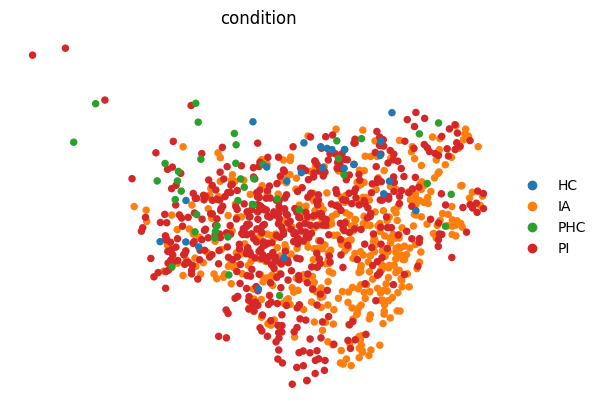

In [13]:
# UMAP Activated-like T cells (condition)
import scanpy as sc

# UMAP of Activated-like T cells colored by condition
sc.pl.umap(
    adata_act,
    color="condition",
    frameon=False,
    show=True
)

In [17]:
# Save figure
sc.pl.umap(
    adata_act,
    color="condition",
    frameon=False,
    show=False,
    save="_Activated_like_Tcells_condition.png"
)

<Axes: title={'center': 'condition'}, xlabel='UMAP1', ylabel='UMAP2'>

### Summary

This notebook focused on the Activated-like T-cell state identified in the global T-cell analysis.
Rather than performing additional re-clustering, analyses emphasized condition-dependent distribution and expression patterns within this activated state, ensuring robustness given the pre-processed nature of the dataset.
